In [16]:
import pandas as pd
# Assuming CSV format
df = pd.read_csv('IMDB_sentiment.csv', quotechar='"', encoding='utf-8', on_bad_lines='skip')


df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)                     # Preprocess text
    text = re.sub(r'[^a-zA-Z\s]', '', text)               
    text = re.sub(r'\s+', ' ', text).strip()              
    return text

df['review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [18]:

df['sentiment'] = df['sentiment'].str.lower().str.strip()
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf


# Initialize tokenizer
vocab_size = 10000  # Max number of words to keep
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad sequences to equal length
max_length = 200  
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')



In [20]:
X = np.array(padded_sequences)
y = np.array(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(y_train)

[0 0 1 ... 0 1 1]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model parameters
embedding_dim = 64  

model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=200),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [24]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - accuracy: 0.7677 - loss: 0.5215 - val_accuracy: 0.7509 - val_loss: 0.5253
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 164ms/step - accuracy: 0.8254 - loss: 0.4287 - val_accuracy: 0.8255 - val_loss: 0.4094
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 170ms/step - accuracy: 0.8601 - loss: 0.3565 - val_accuracy: 0.8473 - val_loss: 0.3598
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 166ms/step - accuracy: 0.8529 - loss: 0.3422 - val_accuracy: 0.8632 - val_loss: 0.3377
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 164ms/step - accuracy: 0.8961 - loss: 0.2752 - val_accuracy: 0.8640 - val_loss: 0.3371
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 166ms/step - accuracy: 0.9028 - loss: 0.2605 - val_accuracy: 0.8378 - val_loss: 0.4527
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.9061 - loss: 0.2558 - val_accuracy: 0.8656 - val_loss: 0.3274
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 160ms/step - accuracy: 0.9275 - 

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9324 - loss: 0.2297
Test Accuracy: 93.32%


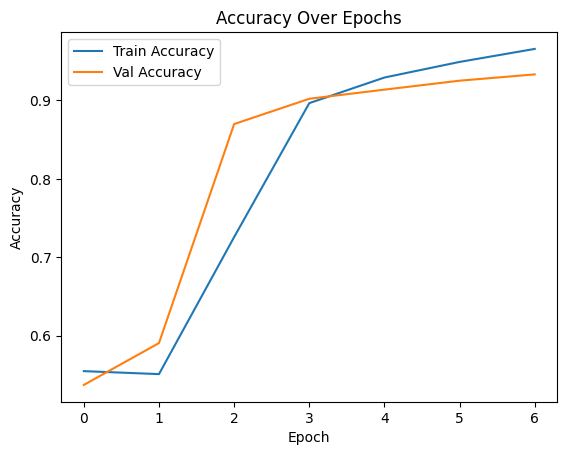

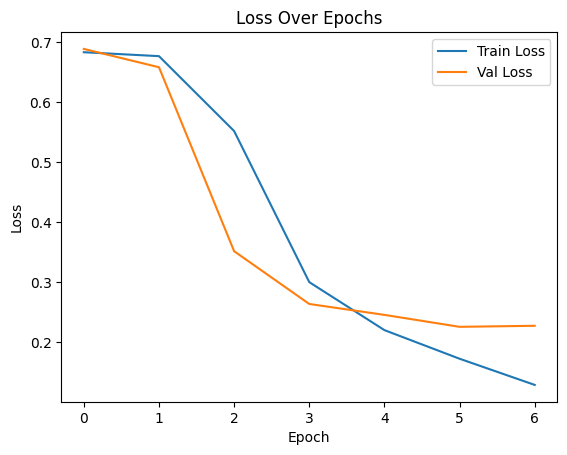

In [32]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
#TEST RESULTS ON REAL DATA
import re
import string
def preprocess_input(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert to sequence
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=200, padding='post', truncating='post')
    return padded
def predict_sentiment(text):
    processed = preprocess_input(text)
    prediction = model.predict(processed)[0][0]

    if prediction >= 0.5:
        print(f"✅ Positive sentiment ({prediction:.2f})")
    else:
        print(f"❌ Negative sentiment ({prediction:.2f})")
predict_sentiment("I really enjoyed this movie.")
predict_sentiment("The plot was good but the acting was not upto the mark.")





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
✅ Positive sentiment (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
❌ Negative sentiment (0.13)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=7,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 162s 144ms/step - accuracy: 0.5350 - loss: 0.6885 - val_accuracy: 0.5372 - val_loss: 0.6885
Epoch 2/7
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 200s 142ms/step - accuracy: 0.5368 - loss: 0.6839 - val_accuracy: 0.5905 - val_loss: 0.6580
Epoch 3/7
   1/1122 ━━━━━━━━━━━━━━━━━━━━ 13:10:42 42s/step - accuracy: 0.7188 - loss: 0.6073